In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv
/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv


In [3]:
df = pd.concat((pd.read_csv('/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv',nrows = 1000000,
                                                                                                           header = 'infer',
                                                                                                           parse_dates = ['event_time'],
                                                                                                           date_parser = pd.to_datetime,),
                pd.read_csv('/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv',nrows = 1000000,
                                                                                                           header = 'infer',
                                                                                                           parse_dates = ['event_time'],
                                                                                                           date_parser = pd.to_datetime,)))

In [6]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


# **RQ-4**
How much does each brand earn per month? Write a function that given the name of a brand in input returns, for each month, its profit. Is the average price of products of different brands significantly different?
* Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing bothe the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).

In [9]:
#How much does each brand earn per month?
df['event_time'] = pd.to_datetime(df['event_time'])
df['event_time'] = df['event_time'].dt.month

Revenue_by_brand = df[(df.event_type == 'purchase')].groupby(['brand','event_time']).agg(revenue = ('price', 'sum'))
Revenue_by_brand

revenue
brand  event_time          
a-case 10              5.10
       11              5.12
acer   10          84198.60
       11          67253.76
acme   10            102.45
...                     ...
zlatek 10            257.30
       11             51.46
zte    10             77.20
       11            154.40
zubr   11            955.48

[1328 rows x 1 columns]

**Since we do not have the cost of products we assume that the price of sold products which is revenue counted as profit. Please see the revenue for each brand and for each month above.**

In [10]:
#Write a function that given the name of a brand in input returns, for each month, its profit.

def profit_by_brand(name_of_brand):

      return df[(df.brand == name_of_brand) & (df.event_type == 'purchase')].groupby(['brand','event_time']).price.sum()

print(df['brand'].unique())

name_of_brand = input('Please enter the name of brand: ')
profit_by_brand(name_of_brand)

['xiaomi' 'janome' 'creed' ... 'ehome' 'britop' 'amigami']
Please enter the name of brand: xiaomi


brand   event_time
xiaomi  10            201739.06
        11            209180.87
Name: price, dtype: float64

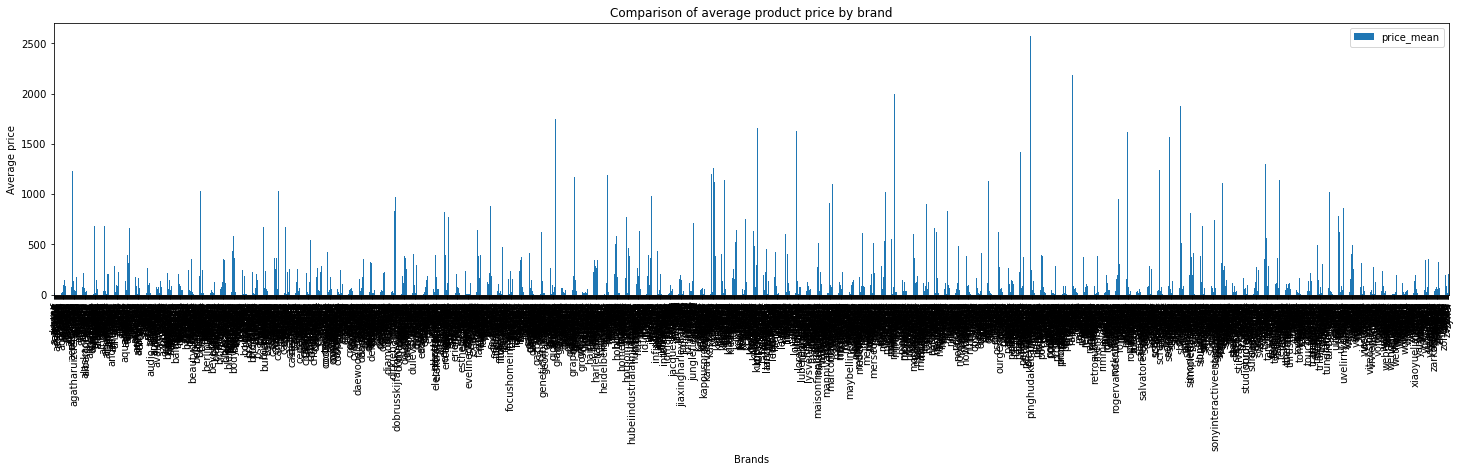

In [11]:
#Is the average price of products of different brands significantly different?

import matplotlib.pyplot as plt
df.groupby(df.brand).agg(price_mean = ('price', 'mean')).plot.bar(figsize=(25,5),
                                                                  title = 'Comparison of average product price by brand',
                                                                  xlabel = 'Brands',
                                                                  ylabel = 'Average price')
plt.show()

**As it is shown above, the mean price of different brand varies significantly.**

In [17]:
#Using the function you just created, find the top 3 brands that have suffered the biggest losses 
#in earnings between one month and the next, specifing bothe the loss percentage 
#and the 2 months (e.g., brand_1 lost 20% between march and april).

df_purchase = df[(df.event_type == 'purchase')].groupby(['event_time','brand']).price.sum().to_frame('revenue').reset_index()

def profit_func(name_of_brand):
    Profit = df_purchase[df_purchase.brand == name_of_brand]
    return Profit

Brand_losses = []
for i in df_purchase.brand.unique():
    Profit = profit_func(i)
    Profit['percentage'] = Profit['revenue'].pct_change()
    Loss = Profit[Profit.percentage.notna()][['brand', 'percentage']]
    Brand_losses.append(Loss)

Brand_losses = pd.concat(Brand_losses)
Biggest_Losses = Brand_losses.sort_values('percentage', ascending = True)[:3]
Biggest_Losses
Biggest_Losses.reset_index(drop = True,inplace = True)

for i in range(len(Biggest_Losses)):
    print(Biggest_Losses.brand[i],'lost', Biggest_Losses.percentage[i], '% between Oct and Nov')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


zeppelin lost -0.9795313827849945 % between Oct and Nov
denn lost -0.9725033467202142 % between Oct and Nov
hotpoint-ariston lost -0.9462641970152131 % between Oct and Nov


**We have find out the top 3 brands that have suffered the biggest losses in earnings between one month and the next and printed them above**